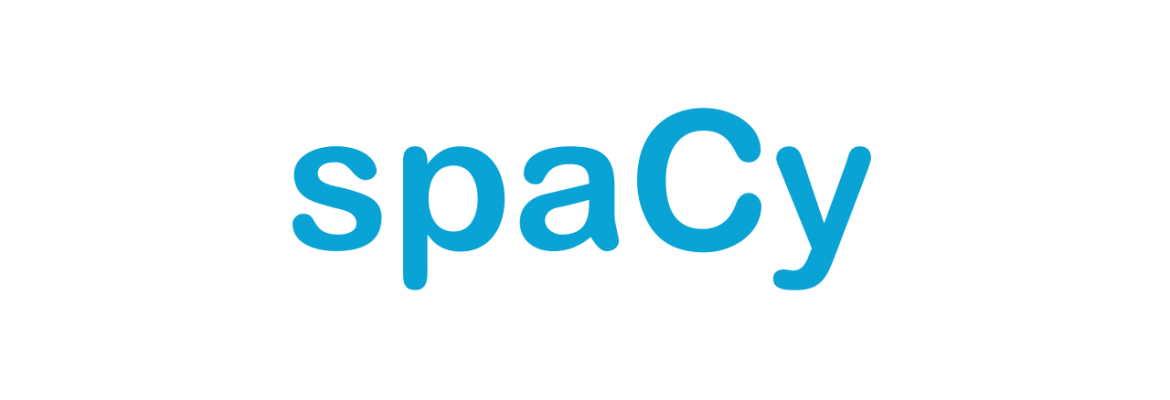

https://spacy.io/

# PRIMEROS PASOS

In [85]:
from spacy import displacy
import spacy

In [86]:
frase = "Haz clic para añadir un subtítulo"

In [87]:
nlp = spacy.blank("es")

In [88]:
print(nlp.pipeline)

[]


In [89]:
doc = nlp(frase)

print(type(doc))
print(doc)

<class 'spacy.tokens.doc.Doc'>
Haz clic para añadir un subtítulo


In [90]:
for token in doc:
  print(token)

Haz
clic
para
añadir
un
subtítulo


In [91]:
doc.text

'Haz clic para añadir un subtítulo'

In [92]:
print("Texto:    ",   [token.text     for token in doc])
print("is_alpha:",    [token.is_alpha for token in doc])
print("is_punct:",    [token.is_punct for token in doc])
print("like_num:",    [token.like_num for token in doc])

Texto:     ['Haz', 'clic', 'para', 'añadir', 'un', 'subtítulo']
is_alpha: [True, True, True, True, True, True]
is_punct: [False, False, False, False, False, False]
like_num: [False, False, False, False, False, False]


# UTILIZANDO PIPELINES YA ENTRENADAS

In [93]:
# Se descarga la pipeline
# !python -m spacy download es_core_news_lg

In [94]:
# En local haciendo spacy.load('es_core_news_sm') es suficiente
# Como se está en el Google Colab se debe buscar específicamente dónde se descargó.

nlp = spacy.load("es_core_news_lg")
# nlp = spacy.load("/usr/local/lib/python3.7/dist-packages/es_core_news_sm/es_core_news_sm-2.2.5")

In [95]:
nlp.pipe_names

['tok2vec', 'morphologizer', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [96]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x23c72983400>),
 ('morphologizer',
  <spacy.pipeline.morphologizer.Morphologizer at 0x23c0069d000>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x23c7d61e6c0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x23c73bb71c0>),
 ('lemmatizer', <spacy.lang.es.lemmatizer.SpanishLemmatizer at 0x23c00685280>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x23c73c0bae0>)]

In [97]:
doc = nlp(frase)
doc.text

'Haz clic para añadir un subtítulo'

In [98]:
displacy.render(doc, style='ent')

e:\Program Files\miniconda\envs\nlp\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [99]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

Haz VERB ROOT
clic NOUN obj
para ADP mark
añadir VERB advcl
un DET det
subtítulo NOUN obj


In [100]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Haz haz VERB VERB ROOT Xxx True False
clic clic NOUN NOUN obj xxxx True False
para para ADP ADP mark xxxx True True
añadir añadir VERB VERB advcl xxxx True False
un uno DET DET det xx True True
subtítulo subtítulo NOUN NOUN obj xxxx True False


In [101]:
import pandas as pd

def doc_dataframe(doc):
    columnas = ["TEXT", "LEMMA", "POS", "TAG", "DEP", "SHAPE", "IS_ALPHA", "IS_STOP"]
    data = [(token.text, token.lemma_, token.pos_, token.tag_, 
            token.dep_, token.shape_, token.is_alpha, token.is_stop)
            for token in doc]
    return pd.DataFrame(data=data, columns=columnas)

df_doc = doc_dataframe(doc)
df_doc

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,IS_ALPHA,IS_STOP
0,Haz,haz,VERB,VERB,ROOT,Xxx,True,False
1,clic,clic,NOUN,NOUN,obj,xxxx,True,False
2,para,para,ADP,ADP,mark,xxxx,True,True
3,añadir,añadir,VERB,VERB,advcl,xxxx,True,False
4,un,uno,DET,DET,det,xx,True,True
5,subtítulo,subtítulo,NOUN,NOUN,obj,xxxx,True,False


In [118]:
displacy.render(doc, style="dep", jupyter=True)

In [103]:
displacy.render(doc, style="ent", jupyter=True)

e:\Program Files\miniconda\envs\nlp\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [111]:
frase = "Matías hace clic para agregar un subtítulo. El subtítulo dice: Introducción a NLP. Estoy en Córdoba, Argentina. Es 25 de mayo de 2022. Sin importar qué haga, el tiempo sigue pasando para Matías. Para los otros, no sé."
frase

'Matías hace clic para agregar un subtítulo. El subtítulo dice: Introducción a NLP. Estoy en Córdoba, Argentina. Es 25 de mayo de 2022. Sin importar qué haga, el tiempo sigue pasando para Matías. Para los otros, no sé.'

In [112]:
doc_2 = nlp(frase)

df_doc_2 = doc_dataframe(doc_2)
df_doc_2

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,IS_ALPHA,IS_STOP
0,Matías,Matías,PROPN,PROPN,nsubj,Xxxxx,True,False
1,hace,hacer,VERB,VERB,ROOT,xxxx,True,True
2,clic,clic,NOUN,NOUN,obj,xxxx,True,False
3,para,para,ADP,ADP,mark,xxxx,True,True
4,agregar,agregar,VERB,VERB,advcl,xxxx,True,False
5,un,uno,DET,DET,det,xx,True,True
6,subtítulo,subtítulo,NOUN,NOUN,obj,xxxx,True,False
7,.,.,PUNCT,PUNCT,punct,.,False,False
8,El,el,DET,DET,det,Xx,True,True
9,subtítulo,subtítulo,NOUN,NOUN,nsubj,xxxx,True,False


In [113]:
displacy.render(doc_2, style="dep", jupyter=True)

## NER

In [114]:
displacy.render(doc_2, style="ent", jupyter=True)

# Vectores y similitud

In [119]:
doc_3 = nlp("El perro come cereales sentado en la mesa, con una cuchara. El perro mira al niño. El niño, incredulo, sale corriendo. Nunca más volvió a ser el mismo, y nunca más se supo del perro.")
doc_3.text

'El perro come cereales sentado en la mesa, con una cuchara. El perro mira al niño. El niño, incredulo, sale corriendo. Nunca más volvió a ser el mismo, y nunca más se supo del perro.'

In [120]:
doc_2.similarity(doc_3)

0.727758703476466

In [122]:
doc_4 = nlp("Los papás hablaron con la psicóloga. Lo que el pequeño les contó no parece verdad. Tim no puede parar de pensar en lo que vio en la cocina.")

doc_3.similarity(doc_4)

0.6573299980136151

In [123]:
doc_5 = nlp("No dejo de pensar un segundo en el día que decidí meterme a esta carrera.")
doc_5.text

'No dejo de pensar un segundo en el día que decidí meterme a esta carrera.'

In [202]:
doc_5.tensor

array([[ 1.451457  , -2.1473665 ,  2.968546  , ...,  0.3300143 ,
        -0.29625776,  1.9858098 ],
       [-2.170496  , -0.9993166 ,  1.6181904 , ...,  1.0990787 ,
         0.05799869,  0.15501031],
       [ 3.4681153 , -2.1543293 , -2.4106944 , ..., -1.4387474 ,
        -0.751002  ,  1.2395215 ],
       ...,
       [-1.9229934 , -1.0683587 , -1.933876  , ..., -3.2747014 ,
        -3.0201755 ,  2.1689525 ],
       [-0.3991456 ,  1.2109056 , -0.9464079 , ..., -0.01534438,
         0.29864103, -0.8162223 ],
       [ 1.7950878 , -3.4068348 ,  1.2031102 , ...,  1.4378874 ,
        -1.6109054 , -2.9666872 ]], dtype=float32)

In [126]:
doc_5.tensor.shape

(16, 96)

In [131]:
doc_5_tokens = [token for token in doc_5]
doc_5_tokens

[No,
 dejo,
 de,
 pensar,
 un,
 segundo,
 en,
 el,
 día,
 que,
 decidí,
 meterme,
 a,
 esta,
 carrera,
 .]

Cada palabra es un vector de dimensión 96. Con eso se determina la similud en significado, a través de comparar los vectores en ese espacio vectorial.

In [132]:
len(doc_5_tokens)

16

In [197]:
doc_6 = nlp("Habló muchísimo en la conferencia.")

print("Doc completo:", doc_6.text)

# Analizo la palabra "Habló"
token_1 = doc_6[0]

print("\ntoken_1:", token_1)
print("\nTensor del token_1:\n", token_1.tensor)
print("\nLemma token_1:", token_1.lemma_)

Doc completo: Habló muchísimo en la conferencia.

token_1: Habló

Tensor del token_1:
 [-0.2487575   3.952012    4.090226    2.0589154  -2.6862874   2.4289422
 -0.78480005 -3.1379392  -0.8407048  -3.5877924  -2.0151706  -0.786996
  1.7114193   1.5588036  -0.925415   -1.0689446   2.0573337   6.1371613
 -0.79992807  1.8972037  -0.5817411  -0.83190525  0.5167342  -0.43284488
  1.8164374  -2.8244584  -1.2460542  -1.1446851   2.933635    2.2062378
 -1.9007466  -0.80412996 -1.470988   -1.4647928  -2.046013    0.9675222
 -0.65441835 -1.100893   -2.1182404   1.0035889  -4.1305914   2.5167484
 -2.9340012   1.4481087  -2.030891    1.9740136   1.2392551  -3.549226
  3.0790334   0.3129444  -1.372509    3.4472394   3.387198    3.117522
  1.2710661   2.605559   -1.571558    1.0962001  -2.3195436  -1.0071406
  1.4190264  -0.49976254  1.1393969  -2.1324992   3.408141   -0.35892445
  4.188601   -0.2536486  -0.5393592   2.9308276   0.1107201   4.3572373
 -0.21299848 -1.457578   -0.08449595 -2.6075587  -

In [198]:

# Comparo con la palabra "conferencia"
token_2 = doc_6[4]

print("\ntoken_2:", token_2)
print("\nTensor del token_2:\n", token_2.tensor)
print("\nLemma token_2:", token_2.lemma_)


token_2: conferencia

Tensor del token_2:
 [ 1.5647774   2.4591804   1.9842222   2.437997    1.0497193   0.5597919
  0.2814319   1.624093   -0.7636567  -1.6760731  -1.696735   -2.8854902
 -1.3740373   1.4584038   0.8355917   0.16096053  1.1776116   0.26686215
  0.2516684  -3.0957386  -0.31173962  0.12601799 -0.34222287  1.3198212
 -3.3719816   1.5897157  -1.125767   -1.5731778   7.4536934  -0.16889673
 -0.761469   -3.9759426   2.3317232  -2.2694728  -0.15660089 -1.4270836
 -0.8584917  -3.7349603  -1.478178   -0.50578123  0.8772652   1.3631604
  1.1375272   2.8591638  -0.43964827  1.1581061  -4.2753267   2.0623803
  1.8800321   0.73558396 -2.2125542  -1.3430277  -0.8909413  -0.8518249
 -0.10423458  0.43063805  1.2887099   3.0848649   1.7190506   0.2240107
 -0.14662498 -2.693869   -0.2277801  -2.5962803   1.2998917   0.09732282
  0.906536   -2.0077891   1.0644554   2.797772   -1.2028366   1.8504469
  0.27180618 -0.28524536 -1.4113767   0.14566815 -1.8012433  -1.1833582
 -2.9841645   2.1

In [199]:
# similitud entre "Habló" y "conferencia"
token_1.similarity(token_2)

0.21675527095794678

In [200]:
# comparación de "Habló" con "la"
token_3 = doc_6[3]

print("\ntoken_3:", token_3)
print("\nTensor del token_3:\n", token_3.tensor)
print("\nLemma token_3:", token_3.lemma_)


token_3: la

Tensor del token_3:
 [-1.1298795  -3.7208147   0.78097373 -0.76003116 -2.161302    0.22784686
  1.819985    1.2139188  -0.53798884 -1.589422    1.1778004   1.7785392
 -1.2440393   0.7869156   0.58494097  4.714219   -1.941246   -0.05478632
  1.782042   -3.0090098   0.5773794   2.4596486  -0.9126995   1.7272955
 -2.7396035  -2.663225    1.8013191   3.8384972   2.7264137  -2.0438478
  1.6617687  -0.08911544 -1.3043783  -2.6119993  -0.9118415  -2.2157755
  0.21055764 -2.6731477  -2.9467587   5.679471   -1.3580967   0.42787147
 -3.1093438  -1.563758    0.96725845 -0.74048793  1.5522645   0.8641391
 -2.3277867   2.1007173   3.08744    -1.3503449   5.8504486  -1.5627109
  1.1251448   1.7923613   3.628189    2.8729825  -0.8488761  -1.7192149
 -1.7427832  -1.7296059   3.1743      3.8901799   0.7566387  -2.7836914
 -1.925099   -0.6993017  -3.3931475   0.7450105   2.1465583  -1.3776734
 -0.30908608 -0.23913735 -1.6228662   3.0785503  -1.8210918  -2.3604932
  1.5864823   5.373213   -

In [201]:
# similitud entre "Habló" y "la"

token_1.similarity(token_3)

0.10914801061153412

Sabiendo que el NER fue entrenado con noticias en español, podemos hacer:

In [194]:
doc_7 = nlp("La persona asesinó con sus propias manos. Tres muertos y dos heridos.")

print("Doc completo:", doc_7.text)

# Analizo la palabra "asesinó"
token_7_1 = doc_7[2]

print("\ntoken_7_1:", token_7_1)
print("\nTensor del token_7_1:\n", token_7_1.tensor)
print("\nLemma token_7_1:", token_7_1.lemma_)

Doc completo: La persona asesinó con sus propias manos. Tres muertos y dos heridos.

token_7_1: asesinó

Tensor del token_7_1:
 [-0.8423819   0.835567    2.716156   -0.6556433  -0.10890926  3.9210072
 -0.91493917 -1.0846083  -2.2175329  -2.7006288  -1.1596861  -1.4408869
 -1.8861119   3.7364817  -1.9876761  -0.14672661  1.7369945   6.1014166
 -3.0181754  -0.78820187  0.9247542  -1.4182954  -2.0163124  -2.0316558
  2.5170107  -0.77999467 -1.6520193  -0.25396222  3.3506336   0.70639443
 -0.69488245 -1.4785712  -0.5385939   1.194699   -0.6483506   0.6741381
 -0.2755627  -2.4860134   1.5179839   0.7094277  -0.8479344   0.5468589
 -2.1074352   2.642277   -1.7486823  -1.0634571  -2.4445243  -3.363566
  3.086155   -0.35045493 -2.5832267   0.6064129   1.0216744   2.366908
 -1.4003168   2.7550526   1.4596334   3.8809032  -3.2710023  -2.9779477
  1.9836624   1.0881767  -0.6461092  -1.0480075   0.87073326  3.3603873
  4.7635646   0.1527333   2.3515432   1.3779452  -0.04100084  3.7568688
  1.78232

In [195]:
# palabra "muertos"
token_7_2 = doc_7[9]

print("\ntoken_7_2:", token_7_2)
print("\nTensor del token_7_2:\n", token_7_2.tensor)
print("\nLemma token_7_2:", token_7_2.lemma_)


token_7_2: muertos

Tensor del token_7_2:
 [-1.27242208e-02  1.18049645e+00  2.82103395e+00  2.21719408e+00
  4.35512602e-01  1.55652237e+00  1.14366174e-01  4.41980743e+00
 -9.02973890e-01 -1.30132079e-01  1.88576961e+00 -3.23796248e+00
 -9.27449703e-01  9.33964252e-01  1.94970977e+00 -1.87648392e+00
 -6.19059229e+00 -2.13905001e+00  8.45786870e-01 -3.78818274e+00
  3.75923872e+00  1.95744291e-01  3.28946739e-01  1.35410631e+00
 -3.25434089e+00  4.30739212e+00  7.17384040e-01 -8.53824556e-01
  3.88763213e+00  3.72633743e+00  4.70242119e+00  9.27107930e-02
 -7.96994716e-02  4.92715597e-01 -1.06704640e+00 -1.04504514e+00
  1.43891498e-01  9.05925155e-01 -1.28190660e+00 -1.05879664e-01
 -2.43504333e+00 -2.75713873e+00 -6.69448495e-01 -1.18993831e+00
 -1.68013945e-01  7.64062643e-01 -2.21358585e+00  1.13772202e+00
  2.50081563e+00 -3.56834292e+00  3.76710367e+00 -1.82117355e+00
 -2.19040656e+00  3.14130604e-01  2.40346521e-01 -1.78323674e+00
  1.76648164e+00  5.25389493e-01 -1.68704796e+

In [203]:
token_7_1.similarity(token_7_2)

0.3987051248550415